**Exploratory Data Analysis**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Load raw dataset
data_path = "../data/raw/GDSC2_raw.xlsx"
data = pd.read_excel(data_path, sheet_name=0)

Basic information about the original dataset

In [46]:
print("Dataset Shape:", data.shape)

Dataset Shape: (242036, 19)


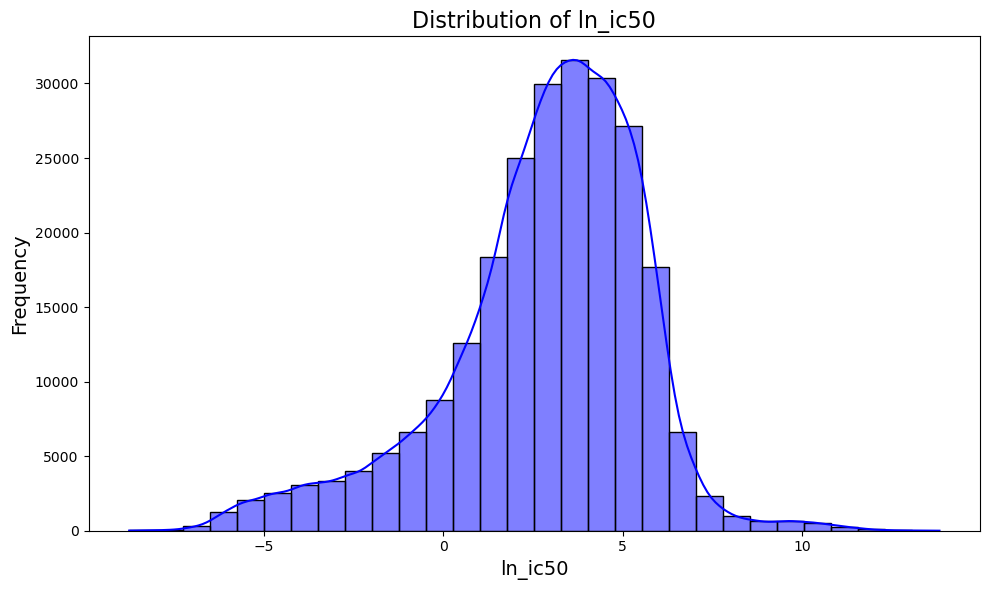

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data["LN_IC50"], kde=True, bins=30, color="blue")
plt.title("Distribution of ln_ic50", fontsize=16)
plt.xlabel("ln_ic50", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.tight_layout()
plt.show()

In [15]:
auc_distribution = data['AUC'].value_counts(bins=10).sort_index()

auc_table = pd.DataFrame({
    'Range': [f"{interval.left:.2f} - {interval.right:.2f}" for interval in auc_distribution.index],
    'Frequency': auc_distribution.values
})

print(auc_table)

         Range  Frequency
0  0.00 - 0.11        631
1  0.11 - 0.20        849
2  0.20 - 0.30       1215
3  0.30 - 0.40       1983
4  0.40 - 0.50       3733
5  0.50 - 0.60       6127
6  0.60 - 0.70      10384
7  0.70 - 0.80      19569
8  0.80 - 0.90      40431
9  0.90 - 1.00     157114


###### 위 분포를 기반으로 auc가 0.35 이하, 0.85 이상인 관측치들만 필터링하여 사용하기로 결정함.

Basic information about the processed dataset

In [2]:
# Load processed dataset used for modeling
c_data = pd.read_csv("../data/processed/GDSC2_cleaned.csv")
print("Dataset Shape:", c_data.shape)
print("\nDataset Info:")
print(c_data.info())

Dataset Shape: (1213, 6)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cell_line_name   1213 non-null   object 
 1   drug_name        1213 non-null   object 
 2   putative_target  1213 non-null   object 
 3   ln_ic50          1213 non-null   float64
 4   disease          1213 non-null   object 
 5   smiles           1213 non-null   object 
dtypes: float64(1), object(5)
memory usage: 57.0+ KB
None


In [53]:
unique_counts = {
    "Variable": ["disease", "drug_name", "putative_target"],
    "Unique Values": [
        c_data["disease"].nunique(),
        c_data["drug_name"].nunique(),
        c_data["putative_target"].nunique()
    ]
}
unique_df = pd.DataFrame(unique_counts)

from tabulate import tabulate
print("\n", tabulate(unique_df, headers="keys", tablefmt="pretty"))


 +---+-----------------+---------------+
|   |    Variable     | Unique Values |
+---+-----------------+---------------+
| 0 |     disease     |      66       |
| 1 |    drug_name    |      243      |
| 2 | putative_target |      180      |
+---+-----------------+---------------+


In [19]:
top_cell_lines = data["cell_line_name"].value_counts().head(5).reset_index()
top_cell_lines.columns = ["Cell Line Name", "Count"]
print("\nTop 5 Cell Lines by Count:")
print(tabulate(top_cell_lines, headers="keys", tablefmt="pretty"))


Top 5 Cell Lines by Count:
+---+----------------+-------+
|   | Cell Line Name | Count |
+---+----------------+-------+
| 0 |     JVM-2      |  88   |
| 1 |     A2780      |  85   |
| 2 |     BPH-1      |  78   |
| 3 |     JVM-3      |  78   |
| 4 |     CAL-54     |  76   |
+---+----------------+-------+


Distribution of target variable IC50 scores in the processed dataset

In [20]:
top_cell_lines = data["drug_name"].value_counts().head(5).reset_index()
top_cell_lines.columns = ["Drug Name", "Count"]
print("\nTop 5 Drugs by Count:")
print(tabulate(top_cell_lines, headers="keys", tablefmt="pretty"))


Top 5 Drugs by Count:
+---+-------------------------+-------+
|   |        Drug Name        | Count |
+---+-------------------------+-------+
| 0 |         MG-132          |  929  |
| 1 |       Sabutoclax        |  819  |
| 2 |      Staurosporine      |  813  |
| 3 |       Dinaciclib        |  804  |
| 4 | Telomerase Inhibitor IX |  768  |
+---+-------------------------+-------+


Visualization of Data Distribution

In [ ]:
# ln_ic50 분포 확인
plt.figure(figsize=(8, 6))
sns.histplot(p_data['ln_ic50'], bins=30, kde=True, color='blue')
plt.title("Distribution of ln_ic50")
plt.xlabel("ln_ic50")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# disease 빈도 확인
plt.figure(figsize=(10, 6))
p_data['disease'].value_counts().head(10).plot(kind='bar', color='green')
plt.title("Top 10 Most Common Diseases")
plt.xlabel("Disease")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# drug_name 빈도 확인
plt.figure(figsize=(10, 6))
p_data['drug_name'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Most Common Drugs")
plt.xlabel("Drug Name")
plt.ylabel("Frequency")
plt.show()

Correlation between Variables

In [ ]:
# 상관관계 행렬 계산
corr_matrix = data.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# disease 별 ln_ic50 분포
plt.figure(figsize=(12, 6))
sns.boxplot(x='disease', y='ln_ic50', data=data)
plt.xticks(rotation=90)
plt.title("ln_ic50 Distribution by Disease")
plt.show()

# drug_name 별 ln_ic50 분포
plt.figure(figsize=(12, 6))
sns.boxplot(x='drug_name', y='ln_ic50', data=data)
plt.xticks(rotation=90)
plt.title("ln_ic50 Distribution by Drug Name")
plt.show()v